<b>Programming Exercise 2 | Logistic Regression </b>

<b> 1 | Logistic Regression </b>

In this exercise, we will implement logistic regression and apply it to two different datasets. 

In [868]:
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [869]:
os.chdir('/Users/christinakouride/Documents/Python/Learning/Andrew Ng - ML course/ex2')

data = np.loadtxt('ex2data1.txt', delimiter=',')

In [870]:
X1 = data[:,0] #Exam 1 score
X2 = data[:,1] #Exam 2 score
X = np.c_[X1,X2] 
 
Y = data[:,2] #Admission result

<b> 1.1 | Visualizing the data </b>

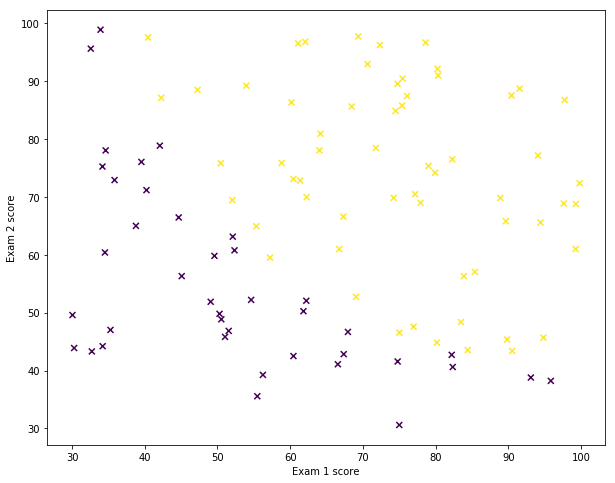

In [871]:
#plot data
plt.figure(figsize=(10,8))
plt.scatter(X1, X2, marker='x',c=Y)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

<b> 1.2 | Implementation </b>

In [872]:
class LinearModel:
    def __init__(self, alpha=1, epochs=400, normalise=True):
        self._alpha = alpha 
        self._epochs = epochs
        
        self.cost = []
        self.theta = [] 
        
        self._current_epoch = 0
        self._converged = False
        self._normalise = normalise
        
        self.means = 0
        self.stddevs = 0
        
    def _X_matrix(self,Xs):
        return np.column_stack((np.ones(len(Xs)), Xs))
    
    def _sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def _compute_cost(self,H,Ys):
        m = Ys.size
        return -1*(1/m)*np.sum(Ys*np.log(H)+(1-Ys)*np.log(1-H))
    
    def predict(self,I):
        I=(I-self.means)/self.stddevs
        I=self._X_matrix(I)
        return self._sigmoid(np.dot(I,self.theta))

    def _normaliser(self,Xs):
        n_features = Xs.shape[1]
        self.means = np.array([np.mean(Xs[:,i]) for i in range(n_features)])
        self.stddevs = np.array([np.std(Xs[:,i]) for i in range(n_features)])
        return (Xs - self.means) / self.stddevs
    
    def gradient_descent(self,Xs,Ys):   
        if self._normalise:
            Xs = self._normaliser(Xs)

        #initialisation
        Xs= self._X_matrix(Xs)
        self.theta = np.zeros(Xs.shape[1])
        gd_theta = np.ones(Xs.shape[1])

        # continue until convergence
        while (self._current_epoch < self._epochs) and (max(abs(gd_theta)) >=.0001):
            
            # prediction
            Z = np.dot(Xs,self.theta)
            H = self._sigmoid(Z)
          
            #update thetas
            gd_theta = np.dot(Xs.T, (H-Ys))/Xs.shape[0]
            self.theta = self.theta - self._alpha*gd_theta
            
            #compute and record cost function
            self.cost.append([self._current_epoch+1,self._compute_cost(H,Ys)])
            self._current_epoch += 1
        
        self._converged = True
        return self._converged



Initial loss: 0.6931471805599453
Trained loss: 0.2036004424822666
Training epochs: 400
Thetas: [1.65947664 3.8670477  3.60347302]




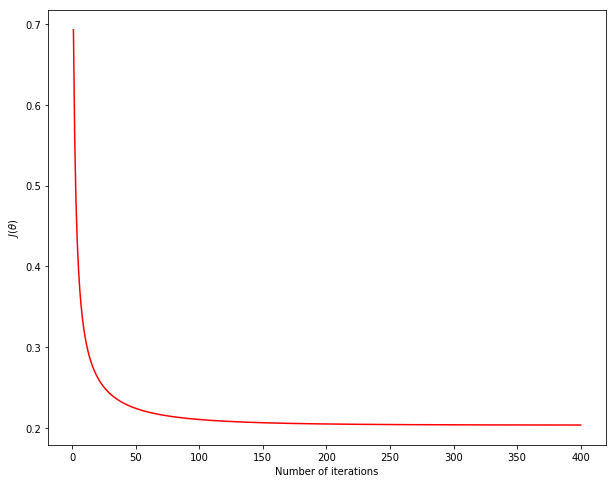

In [873]:
m = LinearModel()
m.gradient_descent(X,Y)
    
print('\n')
print('Initial loss:',m.cost[0][1])
print('Trained loss:', m.cost[-1][1])
print('Training epochs:', m.cost[-1][0])
print('Thetas:',m.theta)
print('\n')
    
plt.figure(figsize=(10,8))
plt.plot(np.array(m.cost)[:,0],np.array(m.cost)[:,1],color='red')
plt.xlabel('Number of iterations')
plt.ylabel(r'$J(\theta)$')
plt.show()    

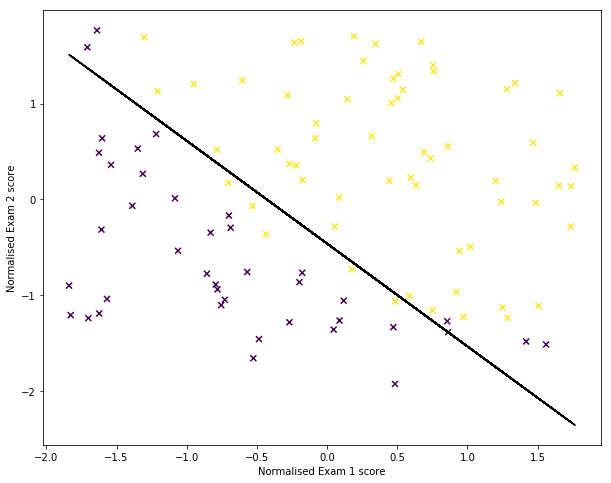

In [874]:
Xnorm = m._normaliser(X)
X1norm = Xnorm[:,0]
X2norm = Xnorm[:,1]

#plot data
plt.figure(figsize=(10,8))
plt.scatter(X1norm, X2norm, marker='x',c=Y)

reg = -(m.theta[0] + m.theta[1]*X1norm) / m.theta[2]
plt.plot(X1norm, reg, c='k')
plt.xlabel("Normalised Exam 1 score")
plt.ylabel("Normalised Exam 2 score")

In [875]:
x1=np.array([45])
x2=np.array([85])
x=np.column_stack((x1,x2))

print("For a student with scores 45 and 85, we predict an admission probability of {:,.3f}".format(m.predict(x)[0]))

For a student with scores 45 and 85, we predict an admission probability of 0.768


In [878]:
p = np.round(m.predict(X))
print('\nTraining Accuracy: ', np.mean((p == Y) * 100))
print('Expected Training Accuracy: 89')


Training Accuracy:  89.0
Expected Training Accuracy: 89


<b> 2 | Regularized logistic regression </b>

In [1006]:
data2 = np.loadtxt('ex2data2.txt', delimiter=',')

In [1007]:
X1 = data2[:,0]
X2 = data2[:,1]
X = np.c_[X1,X2] 

Y = data2[:,2]

<b> 2.1 | Visualizing the data </b>

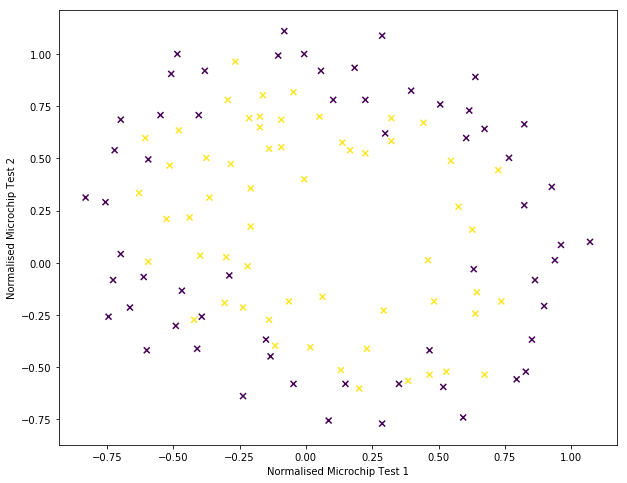

In [1008]:
#plot data
plt.figure(figsize=(10,8))
plt.scatter(X1, X2, marker='x', c=Y)
plt.xlabel("Normalised Microchip Test 1")
plt.ylabel("Normalised Microchip Test 2")

<b> 2.2 | Feature mapping </b>

In [1009]:
def map_features(Xs, degree):
    Xmap = np.ones((Xs.shape[0],1))
    
    for i in range(1,degree+1):
        for j in range(0, i+1):
            term1 = np.power(Xs[:,0], i-j)
            term2 = np.power(Xs[:,1], j)
            term = (term1*term2).reshape(term1.shape[0],1)
            Xmap = np.hstack((Xmap, term))
    return Xmap

In [1018]:
Xmap = map_features(X, 6)
Xmap = Xmap[:,1:]

<b> 2.3 | Cost function and gradient </b>

In [1044]:
class LinearModel:
    def __init__(self, alpha=0.002, epochs=400, normalise=True):
        self._alpha = alpha 
        self._epochs = epochs
        self._l = 1
        
        self.cost = []
        self.theta = [] 
        
        self._current_epoch = 0
        self._converged = False
        self._normalise = normalise
        
        self.means = 0
        self.stddevs = 0
        
    def _X_matrix(self,Xs):
        return np.column_stack((np.ones(len(Xs)), Xs))
    
    def _sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def _compute_cost(self,H,Ys):
        m = Ys.size
        return -1*(1/m)*np.sum(Ys*np.log(H)+(1-Ys)*np.log(1-H)) + (self._l/2)*np.sum(np.square(self.theta[1:]))
        
    def predict(self,I):
        I = (I-self.means)/self.stddevs
        I = self._X_matrix(I)
        return self._sigmoid(np.dot(I,self.theta))

    def _normaliser(self,Xs):
        n_features = Xs.shape[1]
        self.means = np.array([np.mean(Xs[:,i]) for i in range(n_features)])
        self.stddevs = np.array([np.std(Xs[:,i]) for i in range(n_features)])
        return (Xs - self.means) / self.stddevs
    
    def gradient_descent(self,Xs,Ys):   
        if self._normalise:
            Xs = self._normaliser(Xs)

        #initialisation
        Xs = self._X_matrix(Xs)
        self.theta = np.zeros(Xs.shape[1])
        gd_theta = np.ones(Xs.shape[1])

        # continue until convergence
        while (self._current_epoch < self._epochs):
            
            # prediction
            Z = np.dot(Xs,self.theta)
            H = self._sigmoid(Z)

            #update thetas
            for i in range(self.theta.size):
                if(i==0):
                    gd_theta[i] = np.dot(Xs[:,i], (H-Ys))/Xs.shape[0]
                else:
                    gd_theta[i] = (np.dot(Xs[:,i], (H-Ys))/Xs.shape[0] + self._l*self.theta[i]/Xs.shape[0])
          
            self.theta = self.theta - self._alpha*gd_theta
            
            #compute and record cost function
            self.cost.append([self._current_epoch+1,self._compute_cost(H,Ys)])
            self._current_epoch += 1
        
        self._converged = True
        return self._converged



Initial loss: 0.6931477748950492
Trained loss: 0.6218680428048344
Training epochs: 400
Thetas: [-0.00766003 -0.00029327  0.02787072 -0.11602888 -0.02935345 -0.07000315
 -0.01820642 -0.01308661 -0.02402979 -0.02509031 -0.10791123 -0.00428849
 -0.09679727 -0.01134635 -0.07779016 -0.03892759 -0.02125764 -0.02003115
 -0.04163085 -0.02375411 -0.05111573 -0.09028586  0.00111567 -0.09578529
  0.00550408 -0.08493216 -0.00520217 -0.07358718]




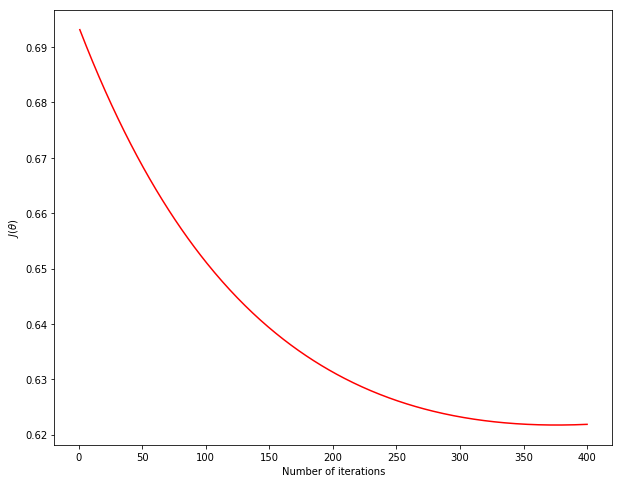

In [1045]:
m = LinearModel()
m.gradient_descent(Xmap,Y)
    
print('\n')
print('Initial loss:',m.cost[0][1])
print('Trained loss:', m.cost[-1][1])
print('Training epochs:', m.cost[-1][0])
print('Thetas:',m.theta)
print('\n')
    
plt.figure(figsize=(10,8))
plt.plot(np.array(m.cost)[:,0],np.array(m.cost)[:,1],color='red')
plt.xlabel('Number of iterations')
plt.ylabel(r'$J(\theta)$')
plt.show()    

<b> 2.4 | Plotting the decision boundary </b>

In [1104]:
p = np.round(m.predict(Xmap))
print('\nTraining Accuracy: ', np.mean((p == Y) * 100))
print('Expected Training Accuracy: 89')


Training Accuracy:  72.03389830508475
Expected Training Accuracy: 89
